In [1]:
#Lets import some basic libraries first!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

Lets import the required data set.

In [2]:
#We have been provided with two data sets: Training and Validation set, Test set.
#Importing training dataset
df_train=pd.read_csv('aug_train.csv', index_col=0) #Using ID as index
df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
#As we see, there are multiple NAN values, lets check the shape of the dataset first.
df_train.shape

(19158, 13)

In [4]:
#Now, lets check the null value count.
df_train.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
#Wow, there are sooo many null values. We have to fill the null values with the relevant points.
cols=list(df_train.select_dtypes(include=['category','object']))

In [6]:
for i in cols:
    print(df_train[i].value_counts())
    print("*"*25)
    

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_121       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64
*************************
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
*************************
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
*************************
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
*************************
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
*************************
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
***

In [7]:
df_train.groupby(['major_discipline'])['gender'].value_counts()

major_discipline  gender
Arts              Male        160
                  Female       36
                  Other         7
Business Degree   Male        226
                  Female       25
                  Other         3
Humanities        Male        429
                  Female      118
                  Other         8
No Major          Male        163
                  Female       16
                  Other         3
Other             Male        247
                  Female       36
                  Other         7
STEM              Male      10145
                  Female      928
                  Other       115
Name: gender, dtype: int64

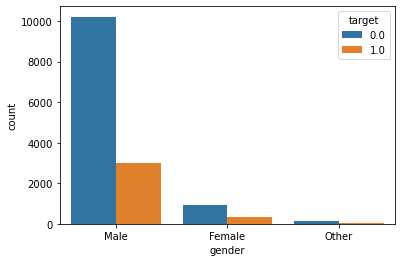

In [8]:
sns.countplot(x=df_train['gender'], hue=df_train['target'])

As we can see from the plot above, most of the job seekers are men.

Now, lets see the job seekers with respect to other variables.

In [9]:
df_train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

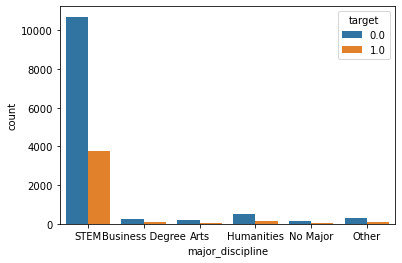

In [10]:
sns.countplot(x=df_train['major_discipline'], hue=df_train['target'])

In [11]:
df_train.groupby(['education_level'])['city_development_index'].median()

education_level
Graduate          0.910
High School       0.897
Masters           0.897
Phd               0.915
Primary School    0.910
Name: city_development_index, dtype: float64

In [12]:
df_train.groupby(['major_discipline'])['city_development_index'].median()

major_discipline
Arts               0.920
Business Degree    0.920
Humanities         0.920
No Major           0.910
Other              0.910
STEM               0.897
Name: city_development_index, dtype: float64

In [13]:
df_train.groupby(['company_size'])['city_development_index'].median()

company_size
10/49        0.896
100-500      0.910
1000-4999    0.913
10000+       0.920
50-99        0.903
500-999      0.910
5000-9999    0.910
<10          0.896
Name: city_development_index, dtype: float64

In [14]:
df_train.groupby(['enrolled_university'])['city_development_index'].median()

enrolled_university
Full time course    0.843
Part time course    0.887
no_enrollment       0.910
Name: city_development_index, dtype: float64

In [15]:
train=df_train.dropna()
train.shape[0]/df_train.shape[0]

0.46742875039148135

In [16]:
df_test=pd.read_csv('aug_test.csv', index_col=0)

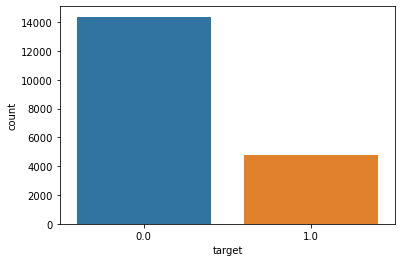

In [17]:
sns.countplot(df_train['target'])

In [18]:
#Now lets try to replace some of the null values.

In [19]:
df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [28]:
#Now lets work on some null values.

In [24]:
df_train['company_size'] = df_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) 
df_train['experience'] = df_train['experience'].apply(lambda x: '0' if x == '<1' else x)
df_train['experience'] = df_train['experience'].apply(lambda x: '20' if x == '>20' else x)
df_train['company_size'].fillna('0',inplace=True)
df_train['company_type'].fillna('Unknown',inplace=True)
df_train['major_discipline'].fillna('Unknown',inplace=True)
df_train['gender'].fillna('Not provided',inplace=True)

In [25]:
df_train.groupby(['gender'])['target'].mean()

gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

In [29]:
df_train.isnull().sum()/len(df_train)

city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.000000
experience                0.003393
company_size              0.000000
company_type              0.000000
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [26]:
df_test['company_size'] = df_test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) 
df_test['experience'] = df_test['experience'].apply(lambda x: '0' if x == '<1' else x)
df_test['experience'] = df_test['experience'].apply(lambda x: '20' if x == '>20' else x)
df_test['company_size'].fillna('0',inplace=True)
df_test['company_type'].fillna('Unknown',inplace=True)
df_test['major_discipline'].fillna('Unknown',inplace=True)
df_test['gender'].fillna('Not provided',inplace=True)

In [30]:
df_test.isnull().sum()/len(df_train)

city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.001618
education_level           0.002714
major_discipline          0.000000
experience                0.000261
company_size              0.000000
company_type              0.000000
last_new_job              0.002088
training_hours            0.000000
dtype: float64

Since majority of the null values have been filled, lets remove the remaining null values from the data sets.

In [31]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [45]:
df_train['experience']=df_train['experience'].astype(int)

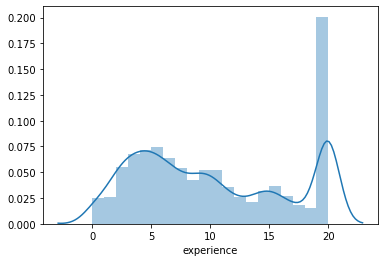

In [47]:
sns.distplot(df_train['experience'], bins=20, label='Years of Experience')

Now lets check the correlation matrix

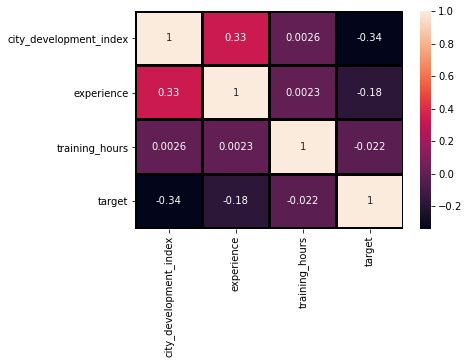

In [43]:
sns.heatmap(df_train.corr(),linewidths=2, linecolor='black', annot=True )

From the heatmap above, it can be said that, as experience increases, job hunting decreases.

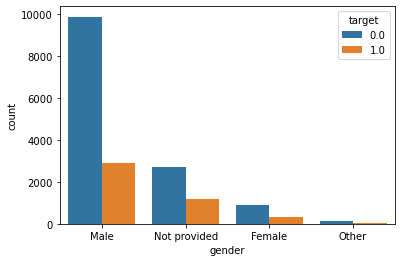

In [58]:
sns.countplot(df_train['gender'], hue=df_train['target'])

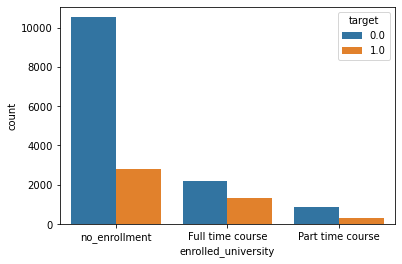

In [57]:
sns.countplot(df_train['enrolled_university'], hue=df_train['target'])

In [59]:
#Now, we have to encode the data.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
def encode(df):
    categorical=list(df.select_dtypes(include=['category','object']))
    for feature in categorical:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [62]:
train=encode(df_train)
test=encode(df_test)

In [63]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,5,0.920,1,0,2,0,5,20,0,6,0,36,1.0
29725,77,0.776,1,1,2,0,5,15,5,5,4,47,0.0
11561,64,0.624,2,1,0,0,5,5,0,6,5,83,0.0
666,50,0.767,1,0,2,2,5,20,5,1,3,8,0.0
21651,57,0.764,2,0,1,0,5,11,0,6,0,24,1.0


In [64]:
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,68,0.827,1,0,0,0,5,20,8,6,0,21
9858,5,0.920,0,0,2,0,5,16,0,5,0,98
31806,54,0.624,1,1,2,1,6,0,0,5,5,15
27385,22,0.827,1,0,2,2,5,3,1,5,0,39
27724,5,0.920,1,0,2,0,5,13,4,5,4,72


In [65]:
#Since we have to predict the target variable, lets check the count of the same.


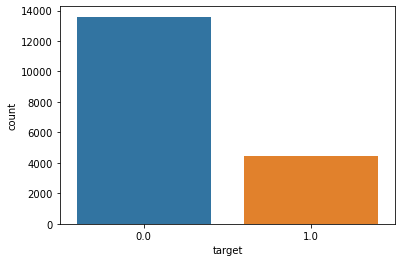

In [66]:
sns.countplot(df_train['target'])

Since the data is imbalanced, we have to balance it first.

Using SMOTE to balance the data.

In [67]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [68]:
X=df_train.drop(['target'],1)
y=df_train['target']

In [69]:
X_sm,y_sm=smote.fit_resample(X,y)

In [70]:
y_sm.value_counts()

0.0    13593
1.0    13593
Name: target, dtype: int64

Now since the data is balanced, we can use several machine learning algorithms to find an optimal ML model.

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, roc_curve
from sklearn.svm import LinearSVC

In [84]:
#Before moving to the machine learning algorithms, lets check the feature importance.

In [75]:
dt=DecisionTreeClassifier()
rnd_clf=RandomForestClassifier()
logreg=LogisticRegression()
knn=KNeighborsClassifier()
gradB=GradientBoostingClassifier()
adaB=AdaBoostClassifier()

In [80]:
#Now lets split our data set into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=33)

In [83]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
classifiers=[dt,rnd_clf,logreg,knn,gradB, adaB]
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,fpr,tpr,auc
classifiers,,,
DecisionTreeClassifier,"[0.0, 0.24699677702900674, 0.24787576911807793...","[0.0, 0.7949172576832151, 0.7966903073286052, ...",0.774538
RandomForestClassifier,"[0.0, 0.0023439789041898623, 0.003515968356284...","[0.0, 0.06767139479905437, 0.12056737588652482...",0.899914
LogisticRegression,"[0.0, 0.0, 0.0, 0.0002929973630237328, 0.00029...","[0.0, 0.0002955082742316785, 0.000591016548463...",0.757772
KNeighborsClassifier,"[0.0, 0.0750073249340756, 0.19953120421916204,...","[0.0, 0.4802009456264775, 0.7396572104018913, ...",0.845234
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0002955082742316785, 0.000886524822695...",0.869543
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0, 0.000591016548463357, 0.0023640661938534...",0.856420


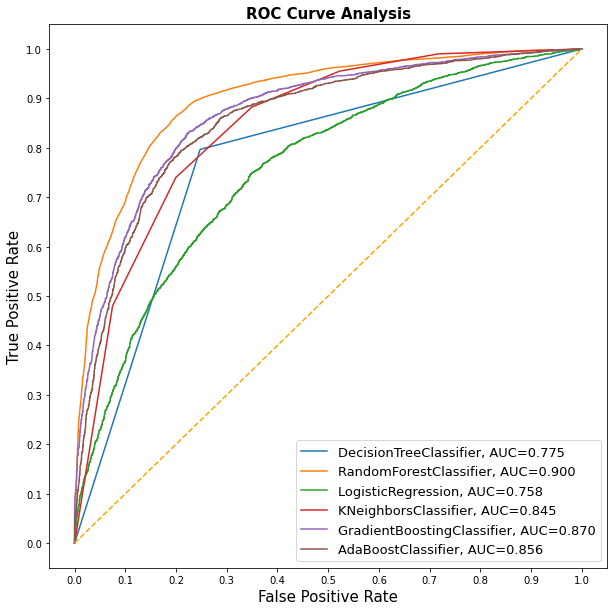

In [85]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

Since random forst and gradient boosting have the highest roc_auc scoer, we will tune both to find the optimal model.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=33)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

In [88]:
#Using gradient boosting algorithm 

In [87]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=0).fit(X_train1, y_train1)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=0).fit(X_train1, y_train1)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=0).fit(X_train1, y_train1)


print("Accuracy on validation data for model_10: ",model_10.score(X_val,y_val))
print("Accuracy on validation data for model_50: ",model_50.score(X_val,y_val))
print("Accuracy on validation data for model_100: ",model_100.score(X_val,y_val))

print(" ")

print("Accuracy on test data for model_10: ", model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ", model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ", model_100.score(X_test,y_test))

Accuracy on validation data for model_10:  0.806522805296714
Accuracy on validation data for model_50:  0.8271211378126533
Accuracy on validation data for model_100:  0.8371750858263854
 
Accuracy on test data for model_10:  0.794468147712226
Accuracy on test data for model_50:  0.8116816242459909
Accuracy on test data for model_100:  0.8193320582609975


Text(0.5, 0, 'Feature Importance Score')

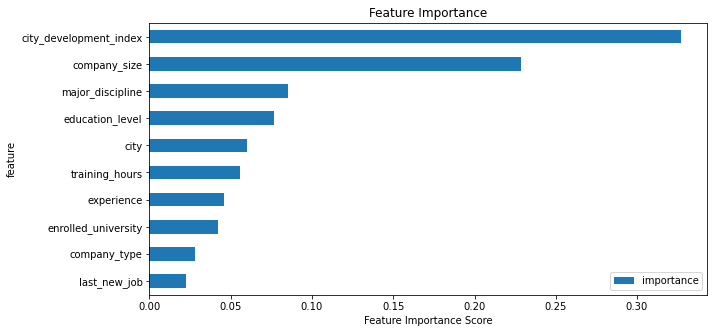

In [89]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importance", figsize=(10,5))
plt.xlabel('Feature Importance Score')

From the plot above, it can be inferred that city development index plays the most important role in prediction of the target variable.

In [90]:
model = GradientBoostingClassifier()
kfold = KFold(n_splits=5, random_state=33, shuffle=True) 
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Gradient Boosting: ", scores.mean())

Mean AUC Score - Gradient Boosting:  0.8759717574961989


In [91]:
#Now, lets use random forest classifier.

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [np.arange(100,1100,100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [np.arange(1,11,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [112]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
y_pred_rnd=rnd_clf.predict(X_test)

In [114]:
print(classification_report(y_test,y_pred_rnd))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      3413
         1.0       0.83      0.83      0.83      3384

    accuracy                           0.83      6797
   macro avg       0.83      0.83      0.83      6797
weighted avg       0.83      0.83      0.83      6797



In [115]:
model_100.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=6, random_state=0)

In [116]:
y_pred_gradB=model_100.predict(X_test)

In [117]:
print(classification_report(y_test,y_pred_gradB))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      3413
         1.0       0.82      0.83      0.83      3384

    accuracy                           0.82      6797
   macro avg       0.83      0.82      0.82      6797
weighted avg       0.83      0.82      0.82      6797

